In [5]:
import torch
import torch.nn as nn
import math
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


In [6]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features = 100, out_features = 196),
            nn.LeakyReLU(inplace= True),
            nn.Linear(in_features = 196, out_features = 392),
            nn.LeakyReLU(inplace= True),
            nn.Linear(in_features= 392, out_features= 784),
            
        )


    def forward(self, x):
        x = self.net(x)
        x = torch.tanh(x)
        return x



In [7]:
class VGGnet(nn.Module):
    
    def __init__(self):

        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(1,64,3,1,padding=1),
            nn.ReLU(True),
            #nn.Conv2d(64,64,3,1,1),
            #nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,padding=1),
            nn.ReLU(inplace = True),
            #nn.Conv2d(128,128,3,1,1),
            #nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,2,1,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256,256,3,1,padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3,1,padding=1),
            nn.ReLU(inplace = True),
            nn.Conv2d(512,512,3,1,padding=1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2,2),
        )
        """self.conv1 = nn.Conv2d(3,64,3,1,1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(64,128,3,1,1)
        self.conv3 = nn.Conv2d(128,256,3,1,1)
        self.conv4 = nn.Conv2d(256,256,3,1,1)
        self.conv5 = nn.Conv2d(256,256,3,1,1)
        self.conv6 = nn.Conv2d(256,256,3,1,1)
        self.conv7 = nn.Conv2d(256,512,3,1,1)
        self.conv8 = nn.Conv2d(512,512,3,1,1)

        self.dropout = nn.Dropout(inplace = True)
        self.ln1 = nn.Linear(in_features=512*2*2, out_features=512)
        self.ln2 = nn.Linear(in_features=512, out_features=128)
        self.ln3 = nn.Linear(in_features=128, out_features=10)
        """    
        
        self.classifier = nn.Sequential(
            #nn.Dropout(inplace=True),
            nn.Linear(in_features=512*2*2, out_features=128),
            nn.ReLU(inplace = True),
            #nn.Dropout(inplace=True),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(inplace = True),
            #nn.Dropout(inplace=True),
            nn.Linear(in_features=64, out_features=1),
        )


    def forward(self,x):
        """x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool(self.relu(self.conv4(x)))
        x = self.relu(self.conv5(x))
        x = self.maxpool(self.relu(self.conv6(x)))
        
        print(x.size())
        x = torch.flatten(x,1)

        x = self.relu(self.ln1(x))
        x = self.relu(self.ln2(x))
        x = self.ln3(x)
        """

        x = self.net(x)
        x = torch.flatten(x,1)
        x = self.classifier(x)

        return x

'''
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        self.net = nn.Sequential(
            nn.Conv2d(3,64,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(64,64,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(128,128,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(256,256,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3,1,1),
            nn.ReLU(True),
            nn.Conv2d(512,512,3,1,1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
        )

        self.classifier = nn.Sequential(
            #nn.Dropout(True),
            #nn.Dropout(True),
            nn.Linear(512*2*2, 512),
            nn.ReLU(True),
            #nn.Dropout(True),
            #nn.Dropout(True),
            nn.Linear(512,128),
            nn.ReLU(True),
            #nn.Dropout(True),
            #nn.Dropout(True),
            nn.Linear(128,10),
        )

    def forward(self, x):
        x = self.net(x)
        #print(x.size())
        x = torch.flatten(x,1)
        x = self.classifier(x)
        return x
'''

class Discriminator(nn.Module):

    def __init__(self):

        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.fc4 = nn.Linear(10,1)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x





In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
print(device)

G = Generator()
D = Discriminator()



cpu


In [9]:
G.to(device)


Generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=196, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=196, out_features=392, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=392, out_features=784, bias=True)
  )
)

In [10]:
D.to(device)

Discriminator(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
)

In [11]:
import torchvision 
import torchvision.transforms as transforms

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

len(trainloader)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


938

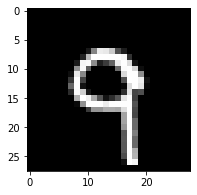

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

img = np.squeeze(images[0])
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')


In [13]:
import torch.optim as optim

lr = 0.005

criterion = nn.BCEWithLogitsLoss()
g_optimizer = optim.Adam(G.parameters(), lr)
d_optimizer = optim.Adam(D.parameters(), lr)

In [14]:
torch.randn(2,3)
z_size = 100

0


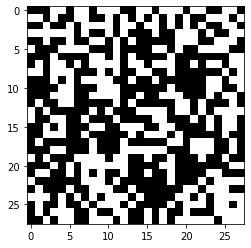

0


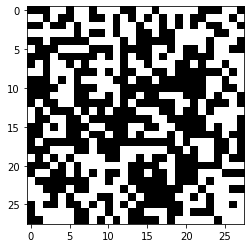

1


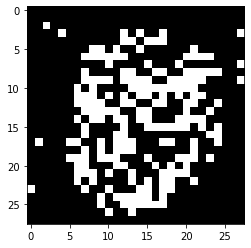

1


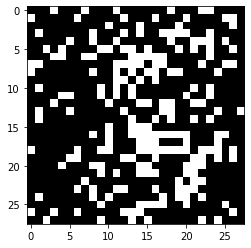

2


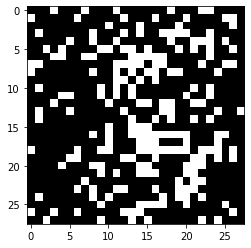

2


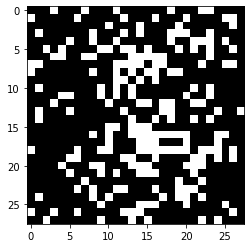

3


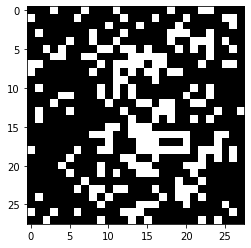

3


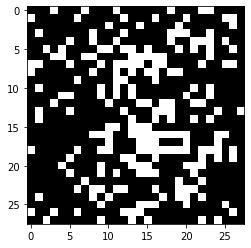

4


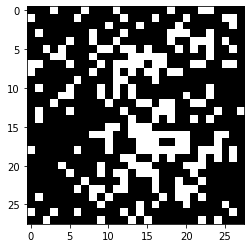

4


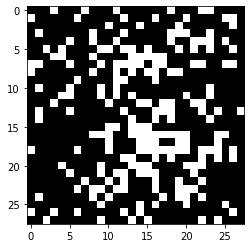

5


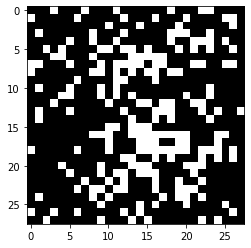

5


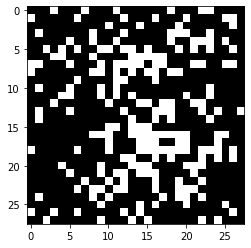

6


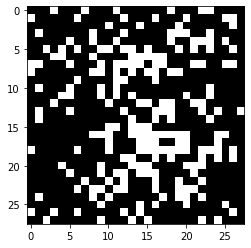

6


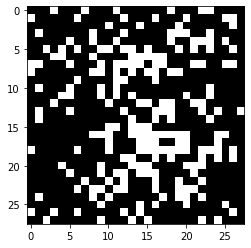

7


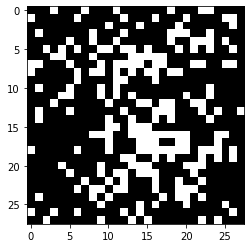

7


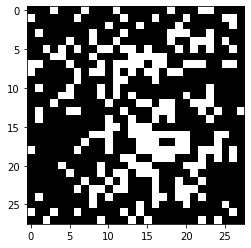

8


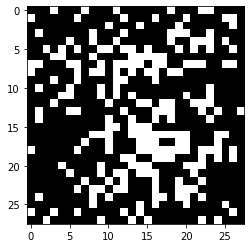

8


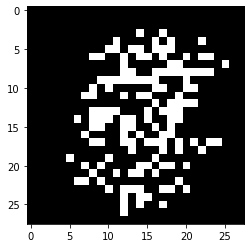

9


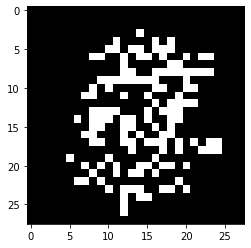

9


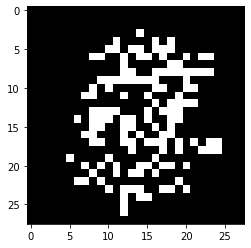

10


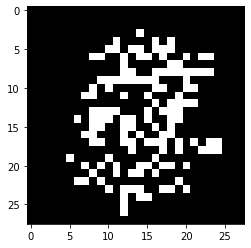

10


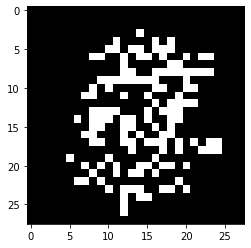

11


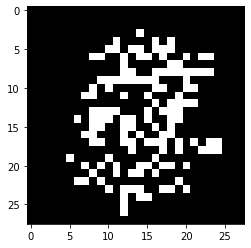

11


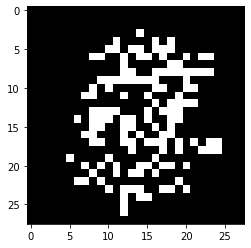

12


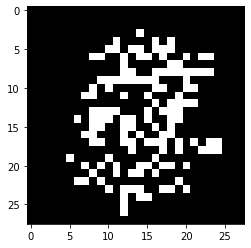

12


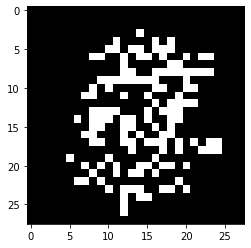

13


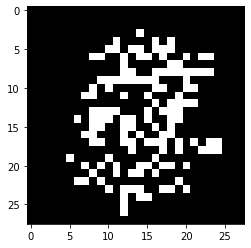

KeyboardInterrupt: ignored

In [15]:
for epoch in range(25):

    for i, (real_input,_) in enumerate(trainloader,0):
        
        batch_size1 = real_input.size(0)
        
        label_1 = torch.ones(batch_size1,1)
        label_0 = torch.zeros(batch_size1,1)

        label_0.to(device)
        label_1.to(device)

        z = np.random.uniform(-1, 1, size=(batch_size1, z_size))
        z = torch.from_numpy(z).float()
        z.to(device)

        #print(g_input.size())
        g_output = G(z)
        #g_output.to(device)

        real_input.to(device)
        r_input = real_input
        r_input = 2*r_input - 1
        r_input.to(device)

        d_optimizer.zero_grad()

        #print(g_output.size())
        r_input = torch.flatten(r_input,1)
        
        #print()
        #print(r_input.size())
        
        real_output = D(r_input)
        fake_output = D(g_output)

        #real_output = torch.flatten(real_output)
        #fake_output = torch.flatten(fake_output)
        #print(real_output.size())
        #print(label_1.size())

        #print(fake_output.size())
        #print(label_0.size())
        real_loss = criterion(real_output, label_1)
        fake_loss = criterion(fake_output, label_0)

        total_loss = real_loss + fake_loss
        total_loss.backward()

        d_optimizer.step()

        #---Training of Generator starts---

        g_optimizer.zero_grad()

        label1 = torch.ones(batch_size1,1)
        label1.to(device)

        z1 = np.random.uniform(-1, 1, size=(batch_size1, z_size))
        z1 = torch.from_numpy(z1).float()
        z1.to(device)

        G_out = G(z1)
        
        out = D(G_out)

        #out = torch.flatten(out)
        Gloss = criterion(out,label1)
        Gloss.backward()
        g_optimizer.step()

        if(i%400 == 399):
            inp = torch.randn(1,100)
            inp.to(device)
            outpt = G(inp)
            print(epoch)

            img = outpt.detach()
            im = plt.imshow(img.reshape(28,28), cmap='Greys_r')
            plt.show()


        #----

